In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Step 1: Define image size and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Step 2: Load datasets using image_dataset_from_directory
data_dir = '/content/drive/My Drive/datasets/organized_images'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

# Step 5: Define model
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train phase 1 (frozen base)
history_phase1 = model.fit(train_ds, epochs=10, validation_data=validation_ds)

# Step 7: Fine-tune entire model
for layer in model.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_phase2 = model.fit(train_ds, epochs=20, validation_data=validation_ds)


Found 7390 files belonging to 35 classes.
Using 5912 files for training.
Found 7390 files belonging to 35 classes.
Using 1478 files for validation.
Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.4683 - loss: 1.9748 - val_accuracy: 0.7510 - val_loss: 0.7371
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.8526 - loss: 0.4642 - val_accuracy: 0.7930 - val_loss: 0.6078
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9140 - loss: 0.2955 - val_accuracy: 0.8065 - val_loss: 0.6009
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9453 - loss: 0.2118 - val_accuracy: 0.8275 - val_loss: 0.5413
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9713 - loss: 0.1435 - val_accuracy: 0.8410 - val_loss: 0.4968
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9850 - loss: 0.1072 - val_accuracy: 0.8363 - val_loss: 0.5031
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.989

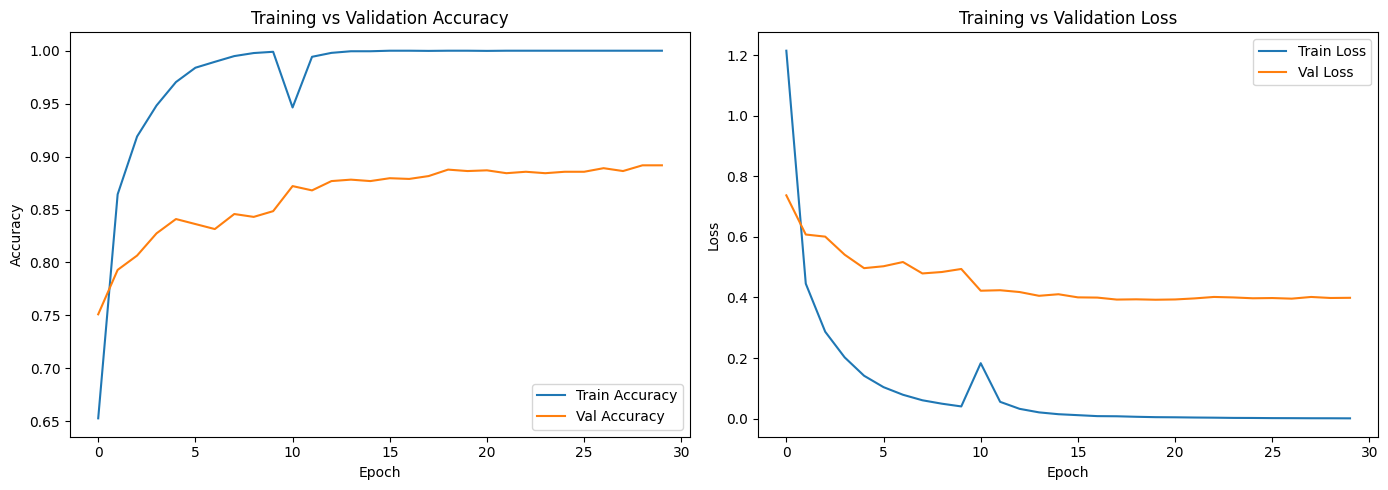

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━

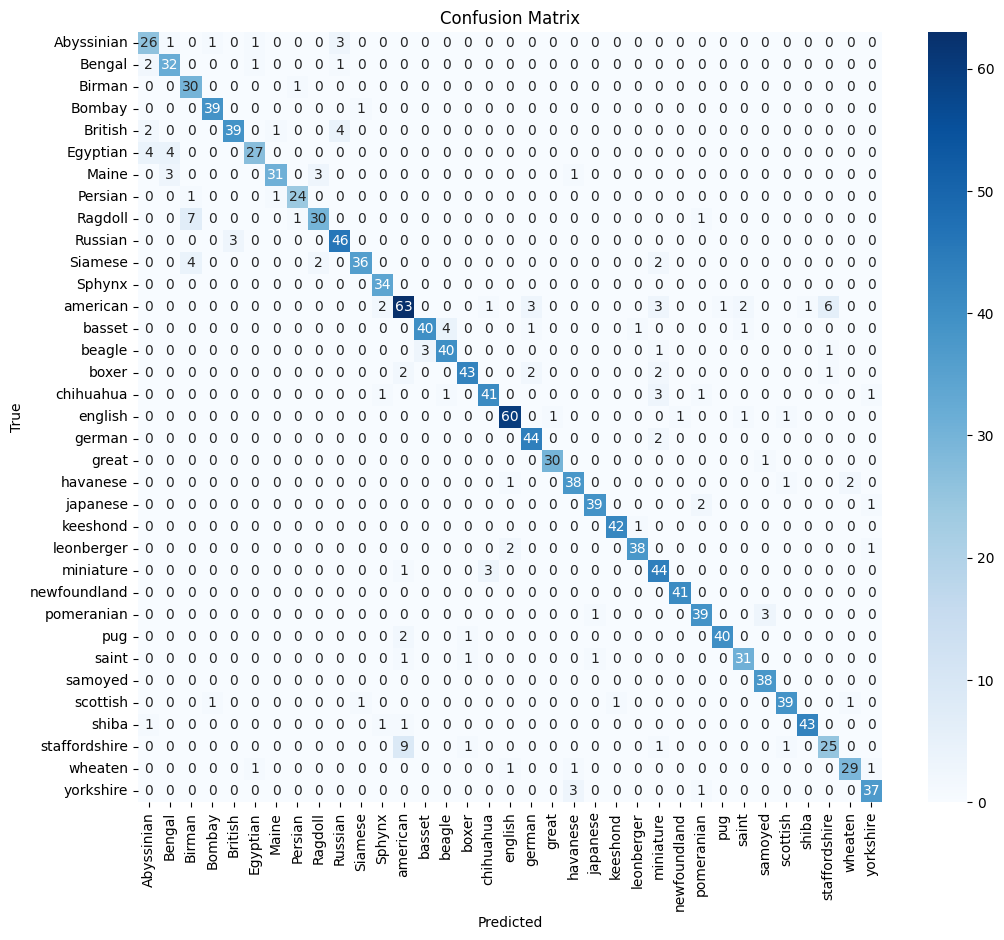

Classification Report:
               precision    recall  f1-score   support

   Abyssinian       0.74      0.81      0.78        32
       Bengal       0.80      0.89      0.84        36
       Birman       0.71      0.97      0.82        31
       Bombay       0.95      0.97      0.96        40
      British       0.93      0.85      0.89        46
     Egyptian       0.90      0.77      0.83        35
        Maine       0.94      0.82      0.87        38
      Persian       0.92      0.92      0.92        26
      Ragdoll       0.86      0.77      0.81        39
      Russian       0.85      0.94      0.89        49
      Siamese       0.95      0.82      0.88        44
       Sphynx       0.89      1.00      0.94        34
     american       0.80      0.77      0.78        82
       basset       0.93      0.85      0.89        47
       beagle       0.89      0.89      0.89        45
        boxer       0.93      0.86      0.90        50
    chihuahua       0.91      0.85      0

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Combine training histories
def combine_histories(h1, h2):
    history = {}
    for key in h1.history:
        history[key] = h1.history[key] + h2.history[key]
    return history

history_combined = combine_histories(history_phase1, history_phase2)

# Plot training & validation accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_combined['accuracy'], label='Train Accuracy')
plt.plot(history_combined['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_combined['loss'], label='Train Loss')
plt.plot(history_combined['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Get predictions
y_true = []
y_pred = []

for images, labels in validation_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
plt.figure(figsize=(12, 10))
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
